In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('insurance.csv')
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [7]:

df['sex'] = df['sex'].replace(['female', 'male'],[0, 1])
df['smoker'] = df['smoker'].replace(['no', 'yes'],[0, 1])
df['region'] = df['region'].replace(['southwest','northwest','southeast','northeast'],[1, 2, 3, 4])
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,3,3756.62160
6,46,0,33.440,1,0,3,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,4,6406.41070
9,60,0,25.840,0,0,2,28923.13692


In [8]:
df.shape

(1338, 7)

In [9]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.513453,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104915,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,3.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [10]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

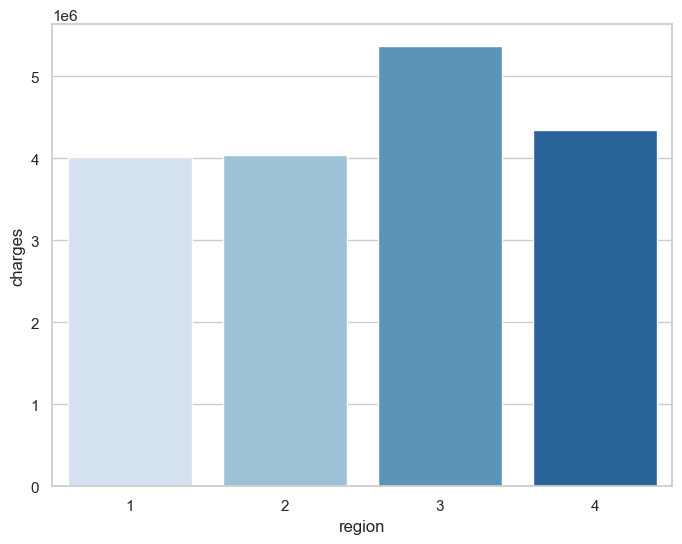

In [14]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), palette='Blues')

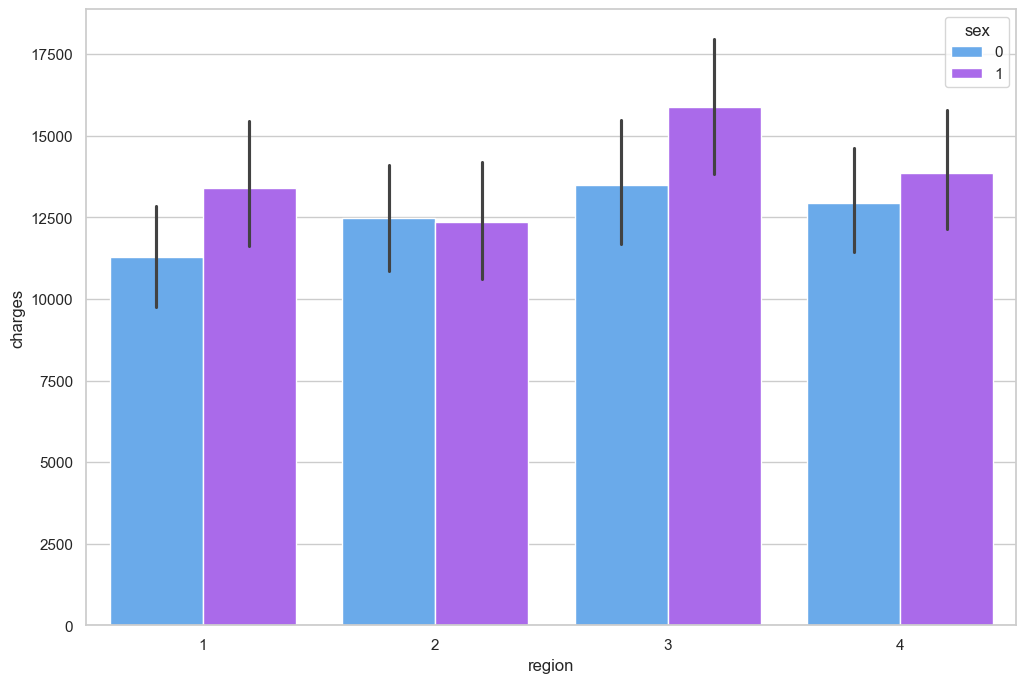

In [15]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

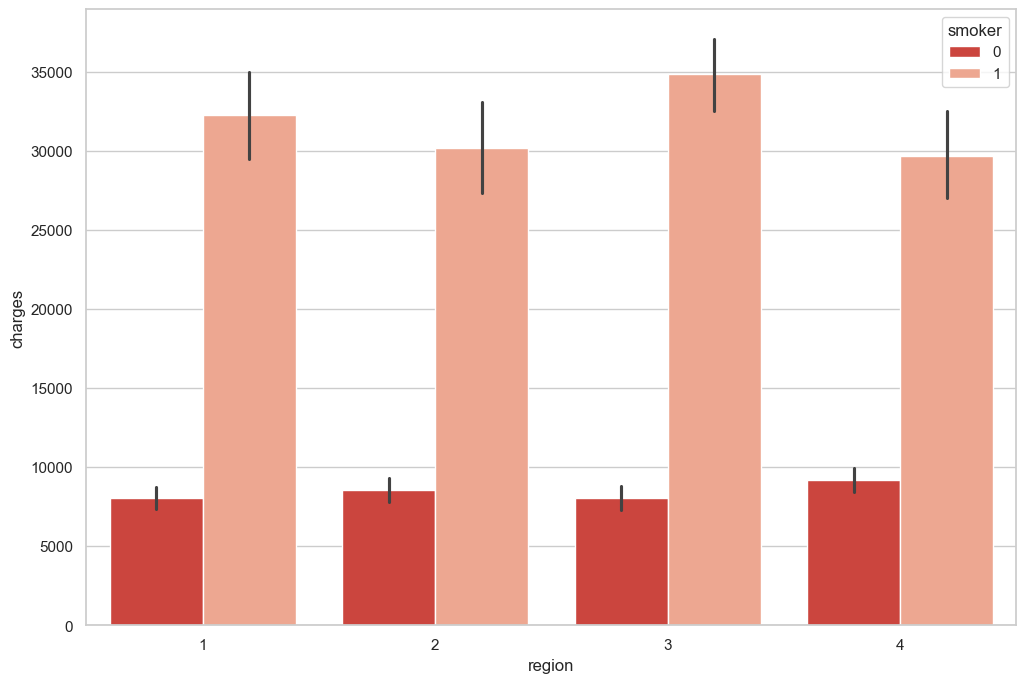

In [16]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

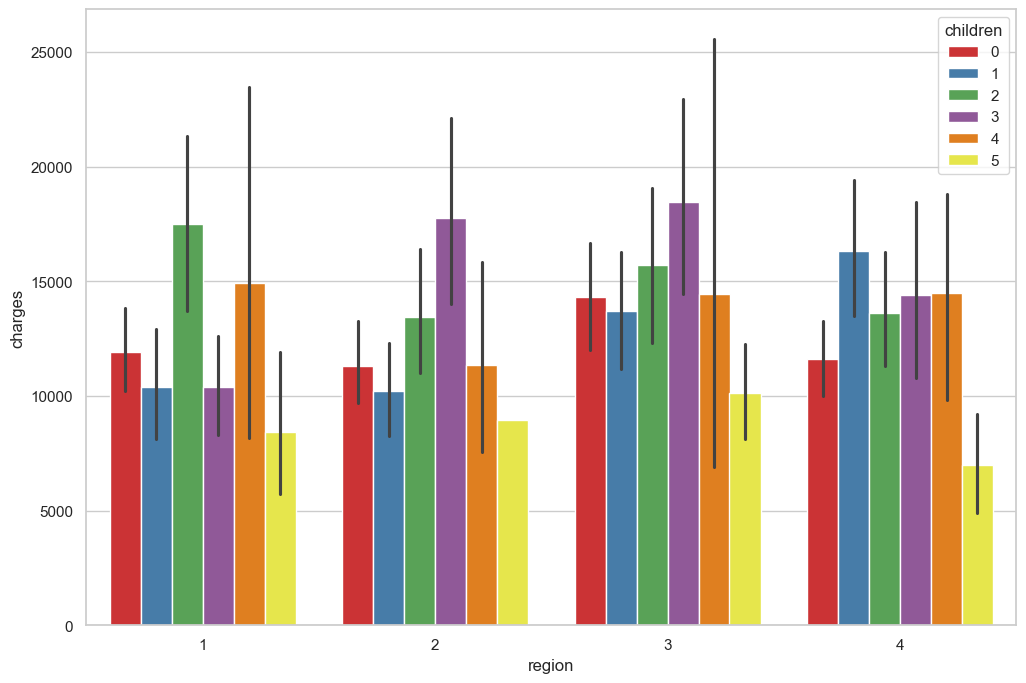

In [17]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

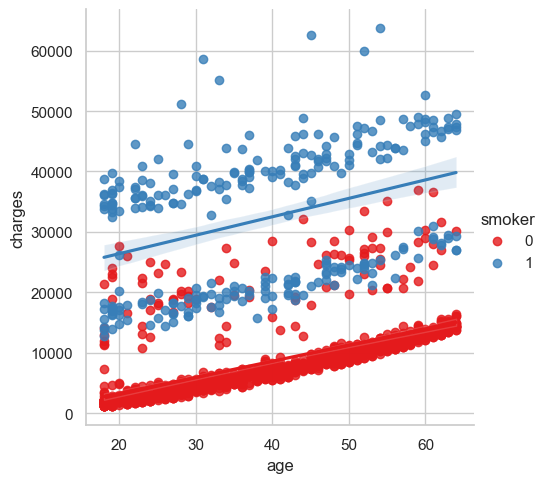

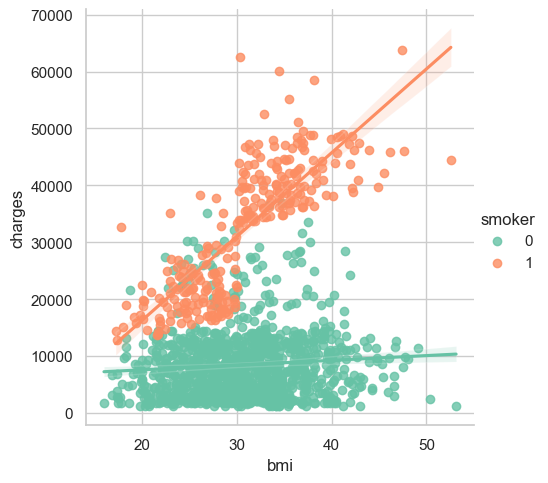

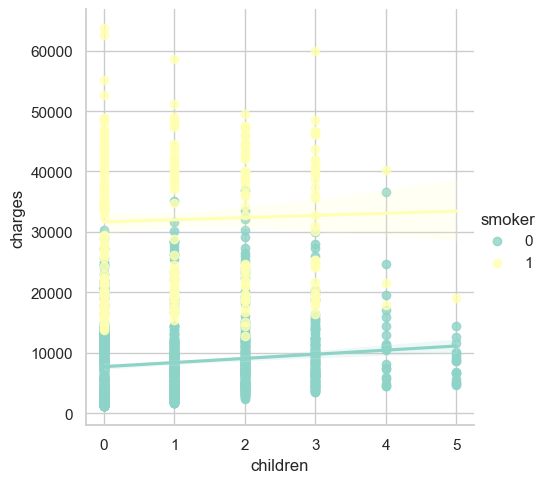

In [18]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

In [19]:
# df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
# df.dtypes

In [20]:
# from sklearn.preprocessing import LabelEncoder
# label = LabelEncoder()
# label.fit(df.sex.drop_duplicates())
# df.sex = label.transform(df.sex)
# label.fit(df.smoker.drop_duplicates())
# df.smoker = label.transform(df.smoker)
# label.fit(df.region.drop_duplicates())
# df.region = label.transform(df.region)
# df.dtypes

In [28]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
model_regresi = LinearRegression()
model_regresi.fit(x_train, y_train)
model_regresi_pred = model_regresi.predict(x_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, model_regresi_pred)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, model_regresi_pred)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Accuration: {model_regresi.score(x_test, y_test) * 100} %')

Mean Absolute Error: 3926.86
Mean Squared Error: 32027989.92
Root Mean Squared Error: 5659.33
Accuration: 79.87306133011286 %


Feature importance ranking


1.smoker(0.601678)
2.bmi(0.219285)
3.age(0.136998)
4.children(0.020566)
5.region(0.015476)
6.sex(0.005996)


<BarContainer object of 6 artists>

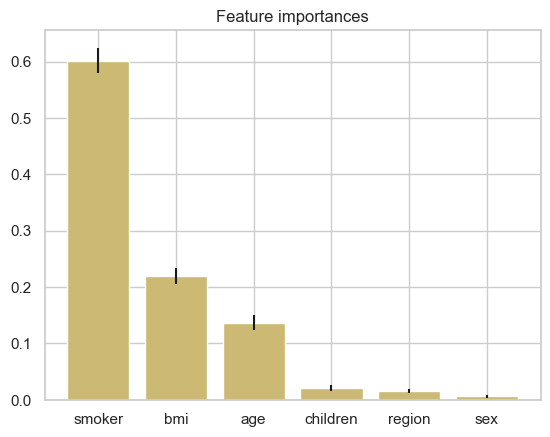

In [24]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
print('Feature importance ranking\n\n')
Rfr = rfr(n_estimators = 100, criterion = 'friedman_mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [35]:
x = df.drop(['sex','region','charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
model_regresi = LinearRegression()
model_regresi.fit(x_train, y_train)
model_regresi_pred = model_regresi.predict(x_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, model_regresi_pred)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, model_regresi_pred)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Accuration: {model_regresi.score(x_test, y_test) * 100} %')

Mean Absolute Error: 3941.07
Mean Squared Error: 32171708.57
Root Mean Squared Error: 5672.01
Accuration: 79.78274606303823 %


In [ ]:
X = np.array([[19, 0, 27.900, 0, 1, 0]])
# 19	0	27.900	0	1	0	16884.92400
biaya = model_regresi.predict(X)
biaya 

array([25067.28229156])

In [ ]:
biaya = biaya.astype(int)
print(biaya)

[25067]


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, model_regresi_pred)
print(f'Mean Absolute Error: {mae:.2f}')

mse = mean_squared_error(y_test, model_regresi_pred)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Accuration: {model_regresi.score(x_test, y_test) * 100} %')

Mean Absolute Error: 3941.07
Mean Squared Error: 32171708.57
Root Mean Squared Error: 5672.01
Accuration: 79.78274606303823 %


In [ ]:
import pickle
filename = 'model_prediksi_asuransi.sav'
pickle.dump(model_regresi, open(filename, 'wb'))